In [1]:
from helpers import *
from tqdm import notebook

In [32]:
def runsims(alpha = 0.95, num_sim=30, temp = 10, stopK = 0.000001, element="swap"):
    sim = AnnealTVS(df, K = temp, stopK = stopK, alpha = alpha, elementary=element, num_sim = num_sim)
    res = sim.run_sim()
    return res

def plot_solution(solution, df):
    df.plot.scatter("x", "y")
    for i in range(len(solution)-1):
        fro = df.loc[solution[i]]
        to = df.loc[solution[i+1]]
        plt.arrow(fro["x"], fro["y"], to["x"]-fro["x"], to["y"]-fro["y"])
    fro = df.loc[solution[len(solution)-1]]
    to = df.loc[solution[0]]
    plt.arrow(fro["x"], fro["y"], to["x"]-fro["x"], to["y"]-fro["y"])

In [27]:
def get_distance(x1, y1, x2, y2) :
    return np.sqrt((x1-x2)**2 + abs(y1-y2)**2)

def total_distance(solution, df):
    distance = 0
    for i in range(len(solution)-1):
        fro = df.loc[solution[i]]
        to = df.loc[solution[i+1]]
        distance += get_distance(fro["x"], fro["y"], to["x"], to["y"])
     # make it a circle
    fro = df.loc[solution[len(solution)-1]]
    to = df.loc[solution[0]]
    distance += get_distance(fro["x"], fro["y"], to["x"], to["y"])
    return distance

In [3]:
df = pd.read_csv("data/eil51.tsp.txt", skiprows=6, names=["id", "x", "y"], header=None, delimiter = ' ', index_col=0).drop("EOF")

In [17]:
sim = AnnealTVS(df, K = 4, num_sim=1,num_searches = 500,stopK = 1, alpha = 0.98, elementary="2opt", verbose=True)

In [18]:
sim.total_distance()

521.1809959306828

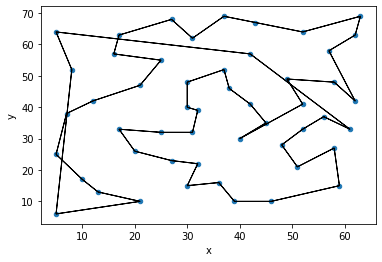

In [19]:
sim.plot_solution()

In [20]:
res = sim.run_sim()

times lowered: 14
times raised:18
times lowered: 19
times raised:20
times lowered: 19
times raised:15
times lowered: 14
times raised:22
times lowered: 33
times raised:28
times lowered: 17
times raised:13
times lowered: 21
times raised:22
times lowered: 20
times raised:16
times lowered: 9
times raised:8
times lowered: 10
times raised:10
times lowered: 15
times raised:20
times lowered: 19
times raised:11
times lowered: 11
times raised:9
times lowered: 17
times raised:12
times lowered: 8
times raised:7
times lowered: 8
times raised:9
times lowered: 11
times raised:10
times lowered: 7
times raised:9
times lowered: 11
times raised:8
times lowered: 10
times raised:10
times lowered: 9
times raised:10
times lowered: 9
times raised:6
times lowered: 8
times raised:9
times lowered: 9
times raised:9
times lowered: 6
times raised:9
times lowered: 14
times raised:11
times lowered: 13
times raised:13
times lowered: 10
times raised:5
times lowered: 10
times raised:12
times lowered: 8
times raised:8
ti

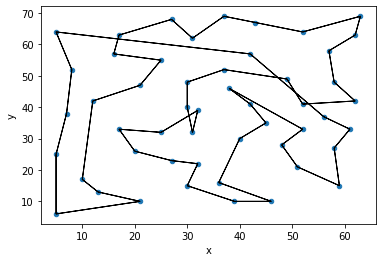

In [21]:
sim.plot_solution()

In [22]:
sim.total_distance()

535.9142723489988

In [23]:
num_sims = 8
results_sims= Parallel(n_jobs=8)(delayed(runsims)(num_sim = 10, temp=i, stopK=.1, element="2opt")
                                      for i in range(num_sims))

In [29]:
total_distance(results_sims[0][0], df)

586.8184202818187

In [30]:
for i in range(len(results_sims)):
    for j in range(len(results_sims[i])):
        print(total_distance(results_sims[i][j], df))

586.8184202818187
586.8184202818187
586.8184202818187
586.8184202818187
586.8184202818187
586.8184202818187
586.8184202818187
586.8184202818187
586.8184202818187
586.8184202818187
550.1443895007519
550.1443895007519
550.1443895007519
550.1443895007519
550.1443895007519
550.1443895007519
550.1443895007519
550.1443895007519
550.1443895007519
550.1443895007519
549.674915852776
549.674915852776
547.8306355765587
541.3792562537827
539.5349759775654
539.5349759775654
539.5349759775654
539.5349759775654
539.5349759775654
539.5349759775654
492.8235893022402
481.90601087539716
489.372279160044
489.372279160044
489.372279160044
489.372279160044
488.1302651975729
484.3270877372524
486.40862308379263
500.62466072014644
557.2146789845351
530.3991432196179
542.1876650005034
525.3961125852256
519.9891376529044
513.4331871123668
521.315849516879
524.7444340742037
516.0986458033535
519.803367104997
569.4057816667045
584.4786272893028
577.980146081118
584.1239982620376
591.7082969457251
593.858531324978

In [33]:
num_sims = 8
results_sims= Parallel(n_jobs=8)(delayed(runsims)(num_sim = 10, temp=i*10, stopK=.1, alpha = 0.9, element="insert")
                                      for i in range(num_sims))

In [34]:
for i in range(len(results_sims)):
    for j in range(len(results_sims[i])):
        print(total_distance(results_sims[i][j], df))

569.5548345286156
569.5548345286156
569.5548345286156
569.5548345286156
569.5548345286156
569.5548345286156
569.5548345286156
569.5548345286156
569.5548345286156
569.5548345286156
490.20457644870015
481.5679266918572
465.7014036123103
497.38087934874966
469.4961865533651
468.3687869834901
490.22643294911757
468.2274767574448
496.9054298037309
479.30097399976967
508.57009434697153
527.6962731813617
525.6190101703133
500.72125768698544
493.8257974764893
520.2858946342353
488.0923880947824
506.63208216406724
498.9589085732975
460.0158652579748
492.4826002312296
492.09667147087345
516.8364807448772
498.2818342369887
499.8116241257196
551.3896763437004
505.0249082034757
535.1664035765904
493.98846641437535
524.1393416758707
524.9280299050268
540.7988805023375
507.4308881258384
481.2551901440699
541.9038685643588
544.6003382417795
539.0371117897248
511.18894426482416
463.62715484227914
505.96032743045856
486.07997901582513
484.7647986477074
533.8168221628736
527.1542126396305
464.54588095627

In [35]:
num_sims = 8
results_sims= Parallel(n_jobs=8)(delayed(runsims)(num_sim = 10, temp=i*10, stopK=.1, alpha = 0.9, element="swap")
                                      for i in range(num_sims))